# &#9678; 911 Calls Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
# Analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualization:
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
%matplotlib inline


In [4]:
df = pd.read_csv("911.csv")

** Let's get started by checking the dataframe's structure: **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


_____

# Basic Questions:

** 1.   What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip'].value_counts(ascending=False).head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** 2. What are the top 5 townships for 911 calls? **

In [8]:
df['twp'].value_counts(ascending=False).head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** 3. How many unique 'title' codes are there? **

In [9]:
df['title'].nunique()

110

_____

## Creating new features

** Let's Extract the reason/department to which the call was placed off of each title from the title column **

In [10]:
df['Reason'] = df['title'].apply(lambda x: x[:x.find(':')])

# Example:
df[['title','Reason']].head()

,title,Reason
0,EMS: BACK PAINS/INJURY,EMS
1,EMS: DIABETIC EMERGENCY,EMS
2,Fire: GAS-ODOR/LEAK,Fire
3,EMS: CARDIAC EMERGENCY,EMS
4,EMS: DIZZINESS,EMS


** What is the most and least common Reason for a 911 call? **

In [11]:
df['Reason'].value_counts(ascending=False)
# We can see that the most common reason is 'EMS'

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

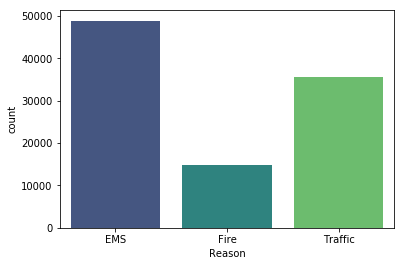

In [12]:
sns.countplot(df['Reason'],palette='viridis')

___

## Time Information

** Let's check the datatype for the 'Timestamp' objects **

In [13]:
type(df['timeStamp'].iloc[0])

str

** Since they are currently being taken as a string, we should convert them to 'date and time' type **

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
# Just example
time = df['timeStamp'].iloc[0]

** Now that the timestamp column are actually DateTime objects, let's create 3 new columns called Hour, Month, and Day of Week. **

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

df['Month'] =df['timeStamp'].apply(lambda x: x.month)

df['DayOfWeek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

** Using the following dictionary, let's attribute the correspondent label to each day number of the newly-created 'DayOfWeek' column **

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)

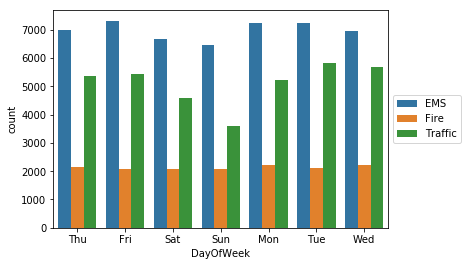

In [20]:
sns.countplot('DayOfWeek',hue='Reason',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, .5))

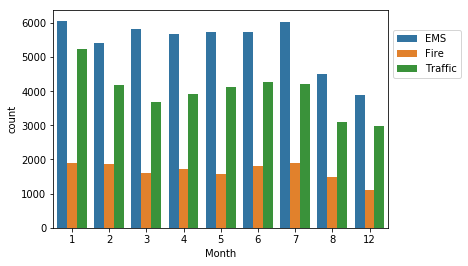

In [21]:
sns.countplot('Month',hue='Reason',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0,.8))

** There is something strange about the plot: it doesn't contain all the months. Let's do some work with pandas in order to get some idea about this missing information  ** 

In [22]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


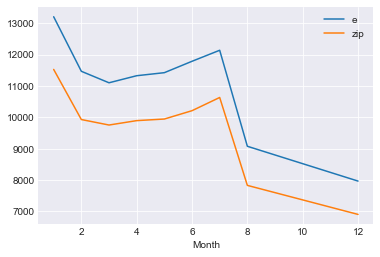

In [23]:
sns.set_style('darkgrid')
byMonth[['e','zip']].plot()

** We wee able to fit the missing months through a simple line plot and get an idea for the behavior.... indeed  we can see the same trend when plotting it into a reguar bar chart **

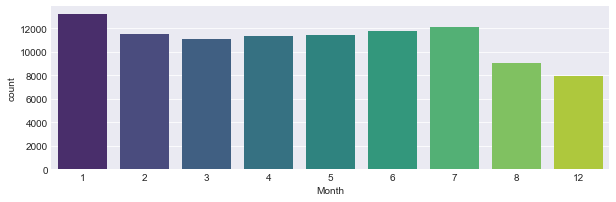

In [24]:
plt.figure(figsize=(10,3))
sns.countplot('Month',data=df,palette='viridis')

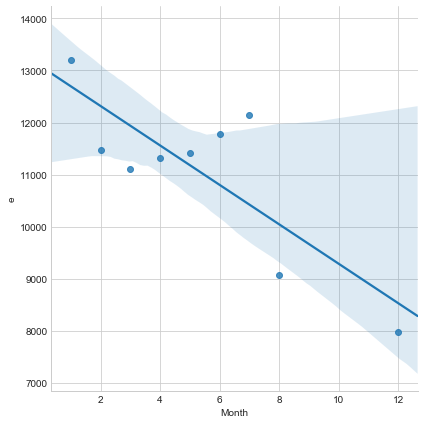

In [25]:
sns.set_style('whitegrid')
sns.lmplot(x= 'Month',y='e',data=byMonth.reset_index(),size=6)

** We can see the area for the error shaded area grows around as we approach months 9-11. Which makes sense since we have less data for these categories **

** Let's create a new column called 'Date' that contains the Date part of the Timestamp column. **

In [26]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

** Let's group our dataset by counting the number of occurrences for each 'Date' and check it **

In [27]:
df.groupby('Date').count().head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


**We can detect some missing values in some columns. Ideally, we should have the same values throughout each row. For instance, for the second row we see some difference between the 'zip' and 'title' columns. So let's go ahead and use the <u>mode</u>  of each row to be the desired paremeter for the subsequent plots:**

In [28]:
byDate = df.groupby('Date').count()

In [29]:
byDate['Mode'] = byDate.mode(axis=1)[0]

** Let's Graph for the number of calls by the newly-created 'Date' Column **

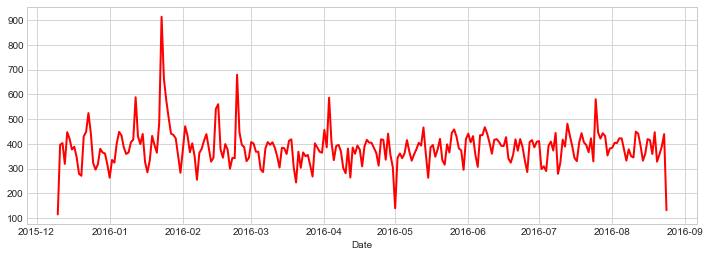

In [30]:
byDate['Mode'].plot(figsize = (12,4),color='Red',lw=2)

** Now, let's breakdown out the above graph into the three sub plots, each one filtered by a reason **

In [31]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

** 'EMS' **

In [32]:
byDate_EMS = df[df['Reason']=='EMS'].groupby('Date').count()
byDate_EMS['Mode'] = byDate_EMS.mode(axis=1)[0]

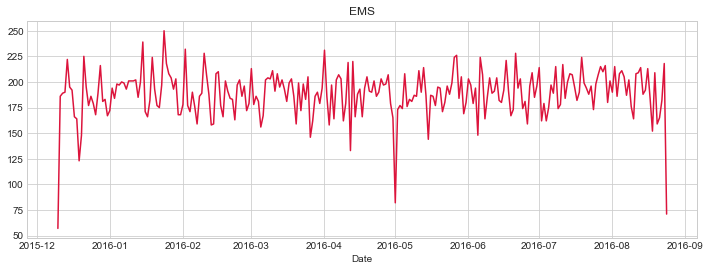

In [33]:
byDate_EMS['Mode'].plot(figsize = (12,4),color='Crimson',title='EMS')

** 'Traffic' **

In [34]:
byDate_Traffic = df[df['Reason']=='Traffic'].groupby('Date').count()
byDate_Traffic['Mode'] = byDate_Traffic.mode(axis=1)[0]

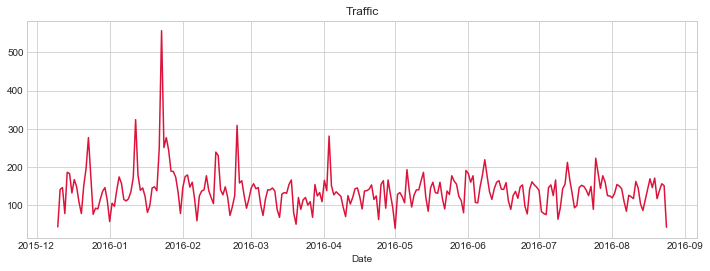

In [35]:
byDate_Traffic['Mode'].plot(figsize = (12,4),color='Crimson',title='Traffic')

** Time of year with most 'Traffic' related emergency calls in 2016: between January until early April. There is a huge peak for the second half of January. **

____

** 'Fire' **

In [36]:
byDate_Fire = df[df['Reason']=='Fire'].groupby('Date').count()
byDate_Fire['Mode'] = byDate_Fire.mode(axis=1)[0]

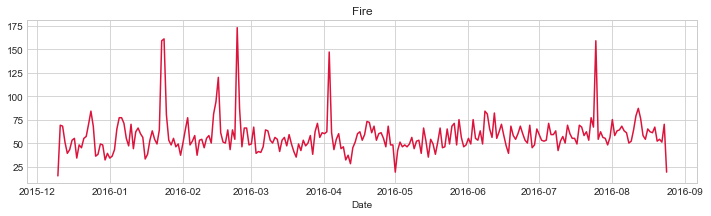

In [37]:
byDate_Fire['Mode'].plot(figsize = (12,3),color='Crimson',title='Fire')

** We can clearly note bigger numbers for emergency calls related to 'Fire' on the first half of the year, these numbers are being pulled up by the weather conditions. Winter is the most common time of year for accidental fires. Space heaters, fireplaces, and candles are examples of hazards that create fire risk in times of cold weather. ** 

___

## Heatmaps

**1.  Hours by Days**

In [38]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'Hour', 'Month', 'DayOfWeek', 'Date'],
      dtype='object')

In [39]:
Days_Hour = df.groupby(['DayOfWeek','Hour']).count()['twp']

** We now have the number of calls for every hour within each day of the year: **

In [40]:
Days_Hour = Days_Hour.unstack()
Days_Hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


** Let's proceed by creating a heatmap of the above matrix **

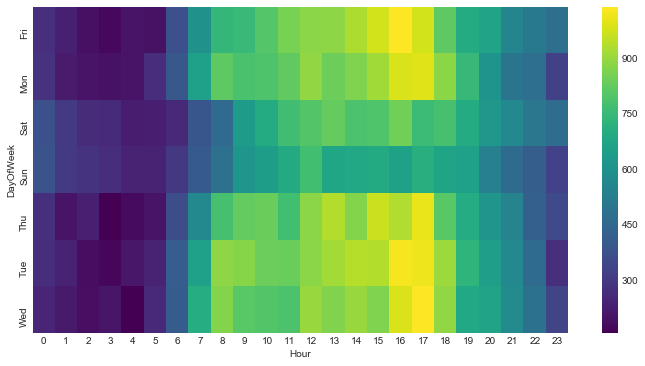

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(Days_Hour,cmap = 'viridis')

** Through the analysis of this Heatmap, we can note that that most calls gravitate between 6 AM and 8 PM. The busiest hours are usually 4 and 5 PM. The weekends tend to be more busy overall, especially during night and early morning hours. **

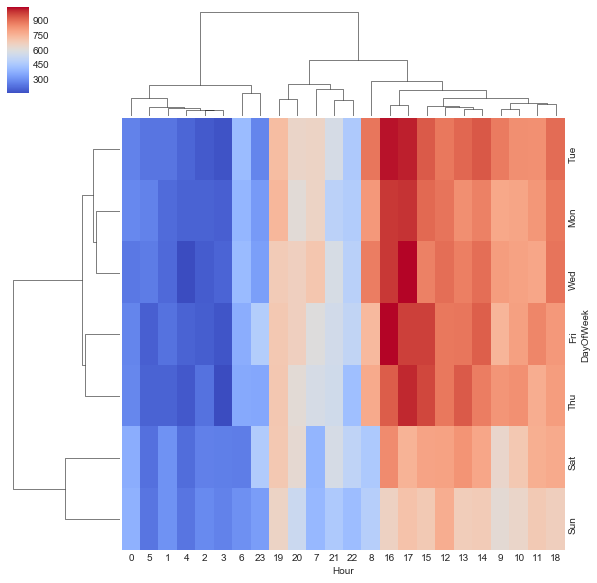

In [42]:
sns.clustermap(Days_Hour,cmap='coolwarm')

** In this clustering view of the heatmap, we can see that we have practically three blocks of alike days: the beggining of the week (Monday, Tuesday and Wednesday), middle (Thursday and Friday) and end of the week (Saturday and Sunday). On the x-axis, we see the hours which are more alike next to each other, in terms of number of calls, that's why they are not necesserily in the correct order. **

**2. Days by Months **

In [43]:
Days_Month = df.groupby(['DayOfWeek','Month']).count()['twp']
Days_Month = Days_Month.unstack()
Days_Month

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


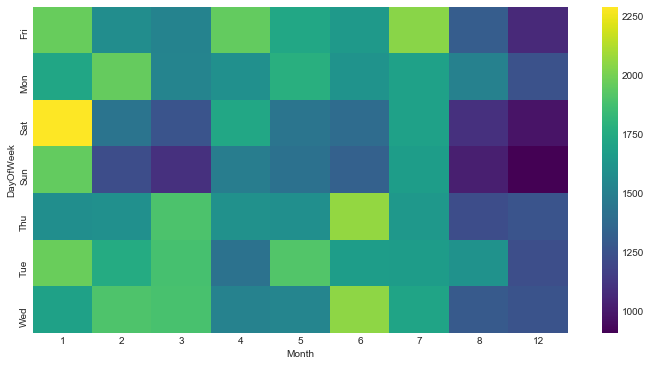

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(Days_Month,cmap = 'viridis')

** In General, Friday tends to have the highest values consistently throughout each month, folowed by Thursday and Wednesday. Saturday presents much more variation and a slightly right-skewed distribution. Sunday is the less demanding day, as its median and overall values resides on much lowers numbers compared to other days. **

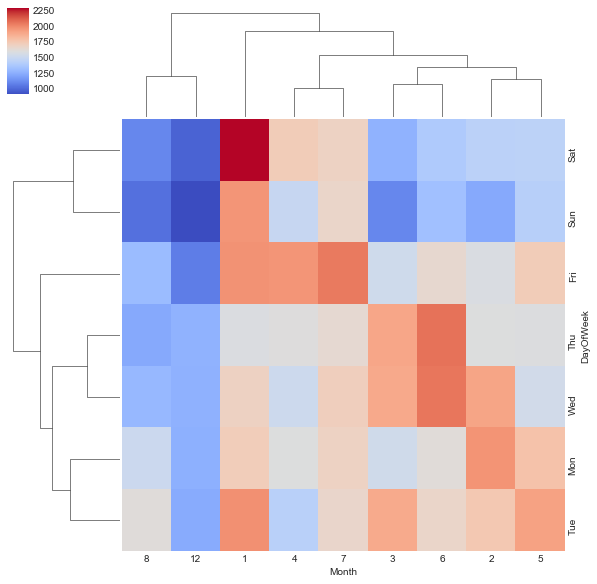

In [45]:
sns.clustermap(Days_Month,cmap='coolwarm')

____

## Map: 911 Number of occurences Montgomery County - PA

The following visualizations were made using Tableau.

# All

![maps](map.png)

# EMS

![maps](EMS.png)

# Fire

![maps](Fire.png)

# Traffic

![maps](Traffics.png)